In [1]:
import numpy as np
import matplotlib.pyplot as plt

# if you edit the function you need to run these lines again otherwise it won't be updated in this notebook
import importlib, plotting_functions
importlib.reload(plotting_functions) 
from plotting_functions import plot_opinions

In [2]:
# for a in agents:
def one_step(index, agent, agents, R):

    selected = np.where(np.abs(agents - agent) <= R)[0]
    update = np.average(agents[selected])
    
    return update

def poll_step(index, agent, agents, R):

    poll = np.round(np.delete(agents, index), 1)
    selected = np.where(np.abs(poll - agent) <= R)[0]
    update = np.average(np.append(poll[selected], agent))

    return update



In [3]:

def opinion_model(agents, R, rounds, advertisers=None, update_func = one_step):

    #number of agents
    n = len(agents)

    #initialize array to store opinions over time
    agents_history = np.zeros((rounds + 1, n))
    agents_history[0, :] = agents

    #do t time steps (main loop)
    for r in range(rounds):

        #make a temp list of agents
        agents_next = np.zeros(n)

        #loop over all agents
        for i, a in enumerate(agents):
            agents_next[i] = update_func(i, a, agents, R)

        #update the agents list
        agents = np.copy(agents_next)
        agents_history[r + 1, :] = agents

    return agents, agents_history
 

In [4]:
# set initial opinions 
n = 1000 #number of agents
agents = np.random.uniform(0, 1, n)
rounds = 10

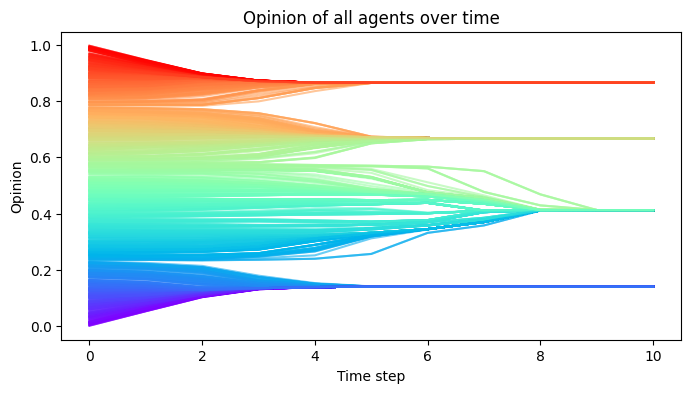

In [8]:
#apply model with one step
agents_1, agents_history_1 = opinion_model(agents = agents, R = 0.1, rounds = rounds, advertisers = None, update_func = one_step)

#plot model
plot_opinions(agents_history_1, agents_history_1[0, :], rounds = 10, alpha=0.6)

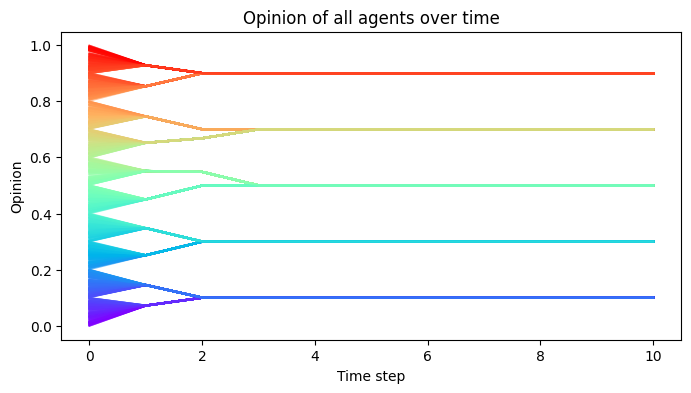

In [11]:
#apply model with polling
agents_1, agents_history_1 = opinion_model(agents = agents, R = 0.1, rounds = rounds, advertisers = None, update_func = poll_step)

#plot model
plot_opinions(agents_history_1, agents_history_1[0, :], rounds, alpha=0.6)